# Starting off:

### In machine learning what is the difference between an  algorithm and a model?







# Reducing Loss with Gradient Descent





Agenda:

- Logic of Gradient Descent
- Determining the Gradient
- Learning Rate
- Quick Practice
- Batches, Epochs and Iterations
- Google Playground

The goal of fitting a model is to minimize our cost function, also referred to as loss.

Earlier we showed how you can use linear algebra to determine the coeeficients that would minimize loss for a linear regression model. This is not possible with all models or data sets.  

Instead we would like to take an interative approach called **gradient descent**.



## Marco Polo

Think of **gradient descent** as a game of Marco Polo: 
- You pick a starting point for your weights, then you call out to the data and it gives you some feedback (loss). 
- After you get that feedback you update your position and get more feedback.
- You repeat this process until you get as close as possible.

<img src='./resources/GradientDescentDiagram.svg' width=500 />

### How do we 'compute parameter updates' 

Suppose we had the time and the computing resources to calculate the loss for all possible values of . For the kind of regression problems we've been examining, the resulting plot of loss vs.  will always be convex. In other words, the plot will always be bowl-shaped, kind of like this:


<img src='./resources/convex.svg' width=500 />

The **gradient descent algorithm** then calculates the gradient of the loss curve at the starting point. 

The gradient of loss is equal to the derivative (slope) of the curve, and tells you which way is "warmer" or "colder." 

<img src='./resources/GradientDescentNegativeGradient.svg' width=500 />

When there are multiple weights, the gradient is a vector of partial derivatives with respect to the weights.

Since gradient is a vector, so it has both of the following characteristics:

- a direction
- a magnitude

Here is the idea of gradient descent in multiple deminsions. 

<img src='./resources/hilldescent.png' width=500 />



### Partial Derivatives of the cost function

<img src='./resources/gdformula.png' width=500 />



### Gradient vector of the cost function

<img src='./resources/vectorofpartialderivative.png' width=500 />

We understand which direction we want to take a step in, but how big of a step should we take?

<img src='./resources/GradientDescentGradientStep.svg' width=500 />


## Learning Rate

Gradient descent algorithms multiply the gradient by a scalar known as the learning rate (also sometimes called step size) to determine the next point. For example, if the gradient magnitude is 2.5 and the learning rate is 0.01, then the gradient descent algorithm will pick the next point 0.025 away from the previous point.

The size of the step is a ***hyperparameter*** that we can choose. 


### Too Small
<img src='./resources/LearningRateTooSmall.svg' width=500 />


### Too Big

<img src='./resources/LearningRateTooLarge.svg' width=500 />


### Just Right

<img src='./resources/LearningRateJustRight.svg' width=500 />


### What is the appropriate learning rate?

The ideal learning rate in one-dimension is  (the inverse of the second derivative of f(x) at x).

The ideal learning rate for 2 or more dimensions is the inverse of the Hessian (matrix of second partial derivatives).

The story for general convex functions is more complex.

#### It is complex to figure out, so let's just try multiple ones and see which one works best.

In [ ]:
### Number of Epochs 

Epochs is anoter hyperparamenter you can 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import random
import seaborn as sns

In [2]:
def gradientDescent(x, y, theta, alpha, m, numEpochs):
    xTrans = x.transpose()
    costs = []
    for i in range(0, numEpochs):
        hypothesis = np.dot(x, theta)
        loss = hypothesis - y
        # avg cost per example (the 2 in 2*m doesn't really matter here.
        # But to be consistent with the gradient, I include it)
        cost = np.sum(loss ** 2) / (2 * m)
        print("Iteration %d | Cost: %f" % (i, cost))
        costs.append(cost)
        print(theta)
        # avg gradient per example
        gradient = np.dot(xTrans, loss) / m
        # update
        theta = theta - alpha * gradient
    sns.scatterplot(y = costs, x = [i for i in range(len(costs))])

In [3]:
def genData(numPoints, bias, variance):
    x = np.zeros(shape=(numPoints, 2))
    y = np.zeros(shape=numPoints)
    # basically a straight line
    for i in range(0, numPoints):
        # bias feature
        x[i][0] = 1
        x[i][1] = i
        # our target variable
        y[i] = (i + bias) + random.uniform(0, 1) * variance
    return x, y

In [4]:
# gen 100 points with a bias of 25 and 10 variance as a bit of noise
x, y = genData(100, 25, 80)
m, n = np.shape(x)

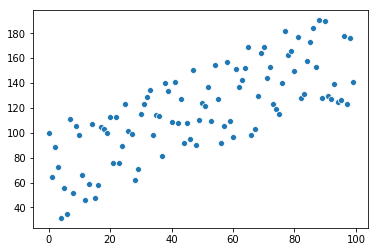

In [5]:
sns.scatterplot(x=x[:,1], y=y)

Iteration 0 | Cost: 1244.026432
[1.90595185 1.5342646 ]
Iteration 1 | Cost: 1044.096291
[1.92611808 2.28118213]
Iteration 2 | Cost: 961.567526
[1.92778802 1.80134869]
Iteration 3 | Cost: 927.445969
[1.941333   2.10924047]
Iteration 4 | Cost: 913.283800
[1.94725088 1.91131568]
Iteration 5 | Cost: 907.351352
[1.95806445 2.03818744]
Iteration 6 | Cost: 904.812223
[1.96573253 1.95649985]
Iteration 7 | Cost: 903.672259
[1.97541854 2.00873308]
Iteration 8 | Cost: 903.109225
[1.98380695 1.97497268]
Iteration 9 | Cost: 902.784095
[1.99302672 1.9964308 ]
Iteration 10 | Cost: 902.557082
[2.0017108  1.98243186]
Iteration 11 | Cost: 902.370549
[2.01073701 1.99120075]
Iteration 12 | Cost: 902.200730
[2.01954168 1.98534992]
Iteration 13 | Cost: 902.037826
[2.02848675 1.98888678]
Iteration 14 | Cost: 901.877796
[2.03733981 1.98639561]
Iteration 15 | Cost: 901.718976
[2.0462501 1.9877752]
Iteration 16 | Cost: 901.560678
[2.0551218  1.98666932]
Iteration 17 | Cost: 901.402618
[2.06401642 1.98715944]
It

Iteration 477 | Cost: 832.847019
[6.03398875 1.9270619 ]
Iteration 478 | Cost: 832.706531
[6.04236923 1.92693555]
Iteration 479 | Cost: 832.566079
[6.05074865 1.92680922]
Iteration 480 | Cost: 832.425662
[6.059127  1.9266829]
Iteration 481 | Cost: 832.285281
[6.06750429 1.9265566 ]
Iteration 482 | Cost: 832.144936
[6.07588051 1.92643031]
Iteration 483 | Cost: 832.004626
[6.08425567 1.92630405]
Iteration 484 | Cost: 831.864352
[6.09262978 1.92617779]
Iteration 485 | Cost: 831.724114
[6.10100281 1.92605156]
Iteration 486 | Cost: 831.583911
[6.10937479 1.92592534]
Iteration 487 | Cost: 831.443743
[6.1177457  1.92579913]
Iteration 488 | Cost: 831.303612
[6.12611556 1.92567294]
Iteration 489 | Cost: 831.163515
[6.13448435 1.92554677]
Iteration 490 | Cost: 831.023455
[6.14285208 1.92542061]
Iteration 491 | Cost: 830.883429
[6.15121874 1.92529447]
Iteration 492 | Cost: 830.743440
[6.15958435 1.92516835]
Iteration 493 | Cost: 830.603486
[6.16794889 1.92504224]
Iteration 494 | Cost: 830.463567


Iteration 940 | Cost: 771.468709
[9.80263143 1.8702438 ]
Iteration 941 | Cost: 771.343792
[9.81053384 1.87012466]
Iteration 942 | Cost: 771.218908
[9.81843524 1.87000553]
Iteration 943 | Cost: 771.094055
[9.82633564 1.86988642]
Iteration 944 | Cost: 770.969233
[9.83423504 1.86976732]
Iteration 945 | Cost: 770.844444
[9.84213343 1.86964824]
Iteration 946 | Cost: 770.719685
[9.85003082 1.86952918]
Iteration 947 | Cost: 770.594959
[9.85792722 1.86941013]
Iteration 948 | Cost: 770.470264
[9.8658226  1.86929109]
Iteration 949 | Cost: 770.345601
[9.87371699 1.86917207]
Iteration 950 | Cost: 770.220970
[9.88161038 1.86905307]
Iteration 951 | Cost: 770.096370
[9.88950276 1.86893408]
Iteration 952 | Cost: 769.971801
[9.89739415 1.8688151 ]
Iteration 953 | Cost: 769.847265
[9.90528453 1.86869614]
Iteration 954 | Cost: 769.722760
[9.91317391 1.8685772 ]
Iteration 955 | Cost: 769.598286
[9.92106229 1.86845827]
Iteration 956 | Cost: 769.473844
[9.92894967 1.86833936]
Iteration 957 | Cost: 769.34943

Iteration 1407 | Cost: 716.449328
[13.38608856  1.81621766]
Iteration 1408 | Cost: 716.338369
[13.39353638  1.81610537]
Iteration 1409 | Cost: 716.227439
[13.40098326  1.8159931 ]
Iteration 1410 | Cost: 716.116537
[13.40842919  1.81588084]
Iteration 1411 | Cost: 716.005663
[13.41587418  1.81576859]
Iteration 1412 | Cost: 715.894817
[13.42331823  1.81565636]
Iteration 1413 | Cost: 715.784000
[13.43076133  1.81554415]
Iteration 1414 | Cost: 715.673210
[13.43820348  1.81543194]
Iteration 1415 | Cost: 715.562449
[13.44564469  1.81531976]
Iteration 1416 | Cost: 715.451716
[13.45308496  1.81520758]
Iteration 1417 | Cost: 715.341010
[13.46052428  1.81509542]
Iteration 1418 | Cost: 715.230333
[13.46796266  1.81498328]
Iteration 1419 | Cost: 715.119684
[13.4754001   1.81487115]
Iteration 1420 | Cost: 715.009063
[13.48283659  1.81475903]
Iteration 1421 | Cost: 714.898470
[13.49027214  1.81464693]
Iteration 1422 | Cost: 714.787906
[13.49770675  1.81453484]
Iteration 1423 | Cost: 714.677369
[13.50

Iteration 1884 | Cost: 666.593331
[16.83356308  1.76424166]
Iteration 1885 | Cost: 666.495021
[16.84057357  1.76413597]
Iteration 1886 | Cost: 666.396735
[16.84758317  1.76403029]
Iteration 1887 | Cost: 666.298475
[16.85459188  1.76392462]
Iteration 1888 | Cost: 666.200240
[16.86159971  1.76381897]
Iteration 1889 | Cost: 666.102030
[16.86860664  1.76371333]
Iteration 1890 | Cost: 666.003844
[16.87561269  1.7636077 ]
Iteration 1891 | Cost: 665.905684
[16.88261784  1.76350209]
Iteration 1892 | Cost: 665.807548
[16.88962211  1.76339649]
Iteration 1893 | Cost: 665.709437
[16.89662549  1.7632909 ]
Iteration 1894 | Cost: 665.611351
[16.90362798  1.76318533]
Iteration 1895 | Cost: 665.513291
[16.91062958  1.76307977]
Iteration 1896 | Cost: 665.415254
[16.9176303   1.76297422]
Iteration 1897 | Cost: 665.317243
[16.92463013  1.76286869]
Iteration 1898 | Cost: 665.219257
[16.93162906  1.76276317]
Iteration 1899 | Cost: 665.121295
[16.93862711  1.76265766]
Iteration 1900 | Cost: 665.023359
[16.94

Iteration 2369 | Cost: 621.724247
[20.13137136  1.71452212]
Iteration 2370 | Cost: 621.637320
[20.1379635   1.71442273]
Iteration 2371 | Cost: 621.550415
[20.14455481  1.71432336]
Iteration 2372 | Cost: 621.463532
[20.15114529  1.714224  ]
Iteration 2373 | Cost: 621.376671
[20.15773492  1.71412465]
Iteration 2374 | Cost: 621.289832
[20.16432372  1.71402531]
Iteration 2375 | Cost: 621.203015
[20.17091169  1.71392599]
Iteration 2376 | Cost: 621.116220
[20.17749882  1.71382668]
Iteration 2377 | Cost: 621.029448
[20.18408511  1.71372738]
Iteration 2378 | Cost: 620.942697
[20.19067057  1.71362809]
Iteration 2379 | Cost: 620.855968
[20.19725519  1.71352882]
Iteration 2380 | Cost: 620.769261
[20.20383898  1.71342956]
Iteration 2381 | Cost: 620.682577
[20.21042193  1.71333031]
Iteration 2382 | Cost: 620.595914
[20.21700405  1.71323107]
Iteration 2383 | Cost: 620.509273
[20.22358533  1.71313185]
Iteration 2384 | Cost: 620.422654
[20.23016578  1.71303264]
Iteration 2385 | Cost: 620.336058
[20.23

Iteration 2807 | Cost: 585.685035
[22.9401548   1.67217538]
Iteration 2808 | Cost: 585.607251
[22.94639064  1.67208136]
Iteration 2809 | Cost: 585.529487
[22.95262568  1.67198736]
Iteration 2810 | Cost: 585.451742
[22.95885994  1.67189337]
Iteration 2811 | Cost: 585.374017
[22.9650934   1.67179939]
Iteration 2812 | Cost: 585.296312
[22.97132607  1.67170542]
Iteration 2813 | Cost: 585.218627
[22.97755795  1.67161147]
Iteration 2814 | Cost: 585.140961
[22.98378904  1.67151752]
Iteration 2815 | Cost: 585.063315
[22.99001934  1.67142359]
Iteration 2816 | Cost: 584.985689
[22.99624885  1.67132967]
Iteration 2817 | Cost: 584.908082
[23.00247757  1.67123577]
Iteration 2818 | Cost: 584.830495
[23.0087055   1.67114187]
Iteration 2819 | Cost: 584.752928
[23.01493264  1.67104799]
Iteration 2820 | Cost: 584.675380
[23.02115899  1.67095411]
Iteration 2821 | Cost: 584.597852
[23.02738455  1.67086025]
Iteration 2822 | Cost: 584.520344
[23.03360932  1.67076641]
Iteration 2823 | Cost: 584.442856
[23.03

Iteration 3260 | Cost: 552.394234
[25.68552486  1.63078469]
Iteration 3261 | Cost: 552.324896
[25.69141243  1.63069593]
Iteration 3262 | Cost: 552.255575
[25.69729926  1.63060717]
Iteration 3263 | Cost: 552.186272
[25.70318533  1.63051843]
Iteration 3264 | Cost: 552.116986
[25.70907066  1.6304297 ]
Iteration 3265 | Cost: 552.047718
[25.71495525  1.63034098]
Iteration 3266 | Cost: 551.978468
[25.72083908  1.63025227]
Iteration 3267 | Cost: 551.909235
[25.72672217  1.63016358]
Iteration 3268 | Cost: 551.840020
[25.73260452  1.63007489]
Iteration 3269 | Cost: 551.770822
[25.73848612  1.62998622]
Iteration 3270 | Cost: 551.701642
[25.74436697  1.62989756]
Iteration 3271 | Cost: 551.632479
[25.75024707  1.6298089 ]
Iteration 3272 | Cost: 551.563334
[25.75612643  1.62972026]
Iteration 3273 | Cost: 551.494207
[25.76200505  1.62963163]
Iteration 3274 | Cost: 551.425097
[25.76788291  1.62954302]
Iteration 3275 | Cost: 551.356004
[25.77376004  1.62945441]
Iteration 3276 | Cost: 551.286929
[25.77

Iteration 3727 | Cost: 521.854206
[28.35532703  1.59053331]
Iteration 3728 | Cost: 521.792615
[28.36087592  1.59044965]
Iteration 3729 | Cost: 521.731040
[28.36642411  1.590366  ]
Iteration 3730 | Cost: 521.669481
[28.37197159  1.59028236]
Iteration 3731 | Cost: 521.607937
[28.37751837  1.59019874]
Iteration 3732 | Cost: 521.546409
[28.38306445  1.59011512]
Iteration 3733 | Cost: 521.484897
[28.38860982  1.59003152]
Iteration 3734 | Cost: 521.423400
[28.39415449  1.58994792]
Iteration 3735 | Cost: 521.361919
[28.39969845  1.58986434]
Iteration 3736 | Cost: 521.300453
[28.40524171  1.58978077]
Iteration 3737 | Cost: 521.239004
[28.41078427  1.5896972 ]
Iteration 3738 | Cost: 521.177569
[28.41632613  1.58961365]
Iteration 3739 | Cost: 521.116150
[28.42186728  1.58953011]
Iteration 3740 | Cost: 521.054747
[28.42740773  1.58944658]
Iteration 3741 | Cost: 520.993359
[28.43294748  1.58936306]
Iteration 3742 | Cost: 520.931987
[28.43848652  1.58927955]
Iteration 3743 | Cost: 520.870631
[28.44

Iteration 4200 | Cost: 494.398674
[30.90291847  1.55212444]
Iteration 4201 | Cost: 494.344048
[30.90814418  1.55204565]
Iteration 4202 | Cost: 494.289437
[30.91336923  1.55196688]
Iteration 4203 | Cost: 494.234840
[30.91859362  1.55188811]
Iteration 4204 | Cost: 494.180256
[30.92381735  1.55180936]
Iteration 4205 | Cost: 494.125686
[30.92904041  1.55173061]
Iteration 4206 | Cost: 494.071131
[30.93426281  1.55165187]
Iteration 4207 | Cost: 494.016589
[30.93948455  1.55157315]
Iteration 4208 | Cost: 493.962060
[30.94470563  1.55149443]
Iteration 4209 | Cost: 493.907546
[30.94992604  1.55141573]
Iteration 4210 | Cost: 493.853045
[30.95514579  1.55133703]
Iteration 4211 | Cost: 493.798559
[30.96036488  1.55125834]
Iteration 4212 | Cost: 493.744086
[30.96558331  1.55117967]
Iteration 4213 | Cost: 493.689627
[30.97080108  1.551101  ]
Iteration 4214 | Cost: 493.635182
[30.97601818  1.55102235]
Iteration 4215 | Cost: 493.580750
[30.98123462  1.5509437 ]
Iteration 4216 | Cost: 493.526332
[30.98

Iteration 4680 | Cost: 469.709243
[33.33657055  1.51543338]
Iteration 4681 | Cost: 469.660882
[33.34148754  1.51535925]
Iteration 4682 | Cost: 469.612532
[33.34640391  1.51528513]
Iteration 4683 | Cost: 469.564195
[33.35131966  1.51521102]
Iteration 4684 | Cost: 469.515871
[33.35623478  1.51513691]
Iteration 4685 | Cost: 469.467558
[33.36114928  1.51506282]
Iteration 4686 | Cost: 469.419258
[33.36606315  1.51498873]
Iteration 4687 | Cost: 469.370970
[33.3709764   1.51491466]
Iteration 4688 | Cost: 469.322694
[33.37588903  1.51484059]
Iteration 4689 | Cost: 469.274431
[33.38080103  1.51476654]
Iteration 4690 | Cost: 469.226179
[33.38571242  1.51469249]
Iteration 4691 | Cost: 469.177940
[33.39062317  1.51461845]
Iteration 4692 | Cost: 469.129714
[33.39553331  1.51454443]
Iteration 4693 | Cost: 469.081499
[33.40044282  1.51447041]
Iteration 4694 | Cost: 469.033297
[33.40535171  1.5143964 ]
Iteration 4695 | Cost: 468.985107
[33.41025998  1.5143224 ]
Iteration 4696 | Cost: 468.936929
[33.41

Iteration 5144 | Cost: 448.537363
[35.55234444  1.48202717]
Iteration 5145 | Cost: 448.494372
[35.55698035  1.48195728]
Iteration 5146 | Cost: 448.451393
[35.56161567  1.48188739]
Iteration 5147 | Cost: 448.408424
[35.5662504   1.48181752]
Iteration 5148 | Cost: 448.365467
[35.57088455  1.48174765]
Iteration 5149 | Cost: 448.322520
[35.57551811  1.48167779]
Iteration 5150 | Cost: 448.279584
[35.58015107  1.48160794]
Iteration 5151 | Cost: 448.236659
[35.58478346  1.4815381 ]
Iteration 5152 | Cost: 448.193745
[35.58941525  1.48146827]
Iteration 5153 | Cost: 448.150842
[35.59404646  1.48139845]
Iteration 5154 | Cost: 448.107950
[35.59867708  1.48132864]
Iteration 5155 | Cost: 448.065068
[35.60330711  1.48125883]
Iteration 5156 | Cost: 448.022198
[35.60793655  1.48118904]
Iteration 5157 | Cost: 447.979338
[35.61256541  1.48111925]
Iteration 5158 | Cost: 447.936489
[35.61719368  1.48104947]
Iteration 5159 | Cost: 447.893651
[35.62182136  1.4809797 ]
Iteration 5160 | Cost: 447.850824
[35.62

Iteration 5598 | Cost: 430.099596
[37.59771261  1.45119009]
Iteration 5599 | Cost: 430.061283
[37.60208906  1.45112411]
Iteration 5600 | Cost: 430.022980
[37.60646494  1.45105814]
Iteration 5601 | Cost: 429.984687
[37.61084028  1.45099217]
Iteration 5602 | Cost: 429.946403
[37.61521505  1.45092622]
Iteration 5603 | Cost: 429.908129
[37.61958928  1.45086027]
Iteration 5604 | Cost: 429.869865
[37.62396294  1.45079433]
Iteration 5605 | Cost: 429.831610
[37.62833606  1.4507284 ]
Iteration 5606 | Cost: 429.793366
[37.63270861  1.45066248]
Iteration 5607 | Cost: 429.755131
[37.63708062  1.45059656]
Iteration 5608 | Cost: 429.716905
[37.64145207  1.45053065]
Iteration 5609 | Cost: 429.678689
[37.64582296  1.45046476]
Iteration 5610 | Cost: 429.640483
[37.6501933   1.45039887]
Iteration 5611 | Cost: 429.602287
[37.65456308  1.45033299]
Iteration 5612 | Cost: 429.564101
[37.65893231  1.45026711]
Iteration 5613 | Cost: 429.525924
[37.66330099  1.45020125]
Iteration 5614 | Cost: 429.487756
[37.66

Iteration 6068 | Cost: 413.122685
[39.59464505  1.42108326]
Iteration 6069 | Cost: 413.088679
[39.59876817  1.4210211 ]
Iteration 6070 | Cost: 413.054682
[39.60289076  1.42095894]
Iteration 6071 | Cost: 413.020693
[39.60701284  1.4208968 ]
Iteration 6072 | Cost: 412.986713
[39.61113439  1.42083466]
Iteration 6073 | Cost: 412.952742
[39.61525542  1.42077253]
Iteration 6074 | Cost: 412.918779
[39.61937592  1.4207104 ]
Iteration 6075 | Cost: 412.884825
[39.62349591  1.42064829]
Iteration 6076 | Cost: 412.850879
[39.62761537  1.42058618]
Iteration 6077 | Cost: 412.816943
[39.63173431  1.42052408]
Iteration 6078 | Cost: 412.783014
[39.63585272  1.42046199]
Iteration 6079 | Cost: 412.749095
[39.63997062  1.42039991]
Iteration 6080 | Cost: 412.715184
[39.64408799  1.42033783]
Iteration 6081 | Cost: 412.681281
[39.64820483  1.42027576]
Iteration 6082 | Cost: 412.647387
[39.65232116  1.4202137 ]
Iteration 6083 | Cost: 412.613502
[39.65643696  1.42015165]
Iteration 6084 | Cost: 412.579626
[39.66

Iteration 6517 | Cost: 398.689861
[41.39430122  1.39395067]
Iteration 6518 | Cost: 398.659517
[41.39819604  1.39389195]
Iteration 6519 | Cost: 398.629180
[41.40209037  1.39383323]
Iteration 6520 | Cost: 398.598851
[41.40598421  1.39377453]
Iteration 6521 | Cost: 398.568530
[41.40987755  1.39371583]
Iteration 6522 | Cost: 398.538217
[41.4137704   1.39365714]
Iteration 6523 | Cost: 398.507911
[41.41766275  1.39359846]
Iteration 6524 | Cost: 398.477613
[41.42155461  1.39353978]
Iteration 6525 | Cost: 398.447322
[41.42544598  1.39348111]
Iteration 6526 | Cost: 398.417040
[41.42933685  1.39342245]
Iteration 6527 | Cost: 398.386765
[41.43322723  1.3933638 ]
Iteration 6528 | Cost: 398.356497
[41.43711712  1.39330515]
Iteration 6529 | Cost: 398.326238
[41.44100651  1.39324651]
Iteration 6530 | Cost: 398.295985
[41.44489541  1.39318788]
Iteration 6531 | Cost: 398.265741
[41.44878381  1.39312926]
Iteration 6532 | Cost: 398.235504
[41.45267173  1.39307064]
Iteration 6533 | Cost: 398.205275
[41.45

[43.18248209  1.36699108]
Iteration 6991 | Cost: 385.136207
[43.18615007  1.36693578]
Iteration 6992 | Cost: 385.109301
[43.18981759  1.36688049]
Iteration 6993 | Cost: 385.082402
[43.19348465  1.3668252 ]
Iteration 6994 | Cost: 385.055510
[43.19715123  1.36676992]
Iteration 6995 | Cost: 385.028625
[43.20081736  1.36671465]
Iteration 6996 | Cost: 385.001746
[43.20448301  1.36665939]
Iteration 6997 | Cost: 384.974875
[43.2081482   1.36660413]
Iteration 6998 | Cost: 384.948010
[43.21181293  1.36654888]
Iteration 6999 | Cost: 384.921152
[43.21547719  1.36649363]
Iteration 7000 | Cost: 384.894301
[43.21914099  1.36643839]
Iteration 7001 | Cost: 384.867456
[43.22280433  1.36638316]
Iteration 7002 | Cost: 384.840619
[43.22646719  1.36632794]
Iteration 7003 | Cost: 384.813788
[43.2301296   1.36627272]
Iteration 7004 | Cost: 384.786964
[43.23379154  1.36621751]
Iteration 7005 | Cost: 384.760147
[43.23745301  1.36616231]
Iteration 7006 | Cost: 384.733336
[43.24111402  1.36610712]
Iteration 7007

[44.85960645  1.34170585]
Iteration 7462 | Cost: 373.190007
[44.86306168  1.34165375]
Iteration 7463 | Cost: 373.166132
[44.86651647  1.34160167]
Iteration 7464 | Cost: 373.142263
[44.86997083  1.34154959]
Iteration 7465 | Cost: 373.118400
[44.87342474  1.34149752]
Iteration 7466 | Cost: 373.094543
[44.87687822  1.34144545]
Iteration 7467 | Cost: 373.070692
[44.88033126  1.34139339]
Iteration 7468 | Cost: 373.046847
[44.88378386  1.34134134]
Iteration 7469 | Cost: 373.023009
[44.88723603  1.34128929]
Iteration 7470 | Cost: 372.999176
[44.89068775  1.34123725]
Iteration 7471 | Cost: 372.975349
[44.89413904  1.34118522]
Iteration 7472 | Cost: 372.951529
[44.89758989  1.34113319]
Iteration 7473 | Cost: 372.927714
[44.9010403   1.34108117]
Iteration 7474 | Cost: 372.903905
[44.90449028  1.34102915]
Iteration 7475 | Cost: 372.880103
[44.90793981  1.34097715]
Iteration 7476 | Cost: 372.856307
[44.91138891  1.34092515]
Iteration 7477 | Cost: 372.832516
[44.91483757  1.34087315]
Iteration 7478

Iteration 7922 | Cost: 362.822837
[46.40688232  1.31837828]
Iteration 7923 | Cost: 362.801592
[46.41014127  1.31832914]
Iteration 7924 | Cost: 362.780352
[46.4133998   1.31828002]
Iteration 7925 | Cost: 362.759118
[46.41665793  1.3182309 ]
Iteration 7926 | Cost: 362.737889
[46.41991564  1.31818178]
Iteration 7927 | Cost: 362.716666
[46.42317293  1.31813267]
Iteration 7928 | Cost: 362.695448
[46.42642982  1.31808357]
Iteration 7929 | Cost: 362.674235
[46.42968629  1.31803447]
Iteration 7930 | Cost: 362.653028
[46.43294235  1.31798538]
Iteration 7931 | Cost: 362.631826
[46.43619799  1.3179363 ]
Iteration 7932 | Cost: 362.610629
[46.43945322  1.31788722]
Iteration 7933 | Cost: 362.589438
[46.44270804  1.31783815]
Iteration 7934 | Cost: 362.568252
[46.44596244  1.31778909]
Iteration 7935 | Cost: 362.547072
[46.44921644  1.31774003]
Iteration 7936 | Cost: 362.525897
[46.45247002  1.31769097]
Iteration 7937 | Cost: 362.504727
[46.45572318  1.31764193]
Iteration 7938 | Cost: 362.483563
[46.45

Iteration 8394 | Cost: 353.371183
[47.90005298  1.29586643]
Iteration 8395 | Cost: 353.352336
[47.90312251  1.29582015]
Iteration 8396 | Cost: 353.333494
[47.90619165  1.29577388]
Iteration 8397 | Cost: 353.314656
[47.90926041  1.29572761]
Iteration 8398 | Cost: 353.295824
[47.91232877  1.29568135]
Iteration 8399 | Cost: 353.276996
[47.91539675  1.2956351 ]
Iteration 8400 | Cost: 353.258172
[47.91846433  1.29558885]
Iteration 8401 | Cost: 353.239354
[47.92153153  1.29554261]
Iteration 8402 | Cost: 353.220540
[47.92459834  1.29549637]
Iteration 8403 | Cost: 353.201731
[47.92766476  1.29545014]
Iteration 8404 | Cost: 353.182927
[47.93073079  1.29540391]
Iteration 8405 | Cost: 353.164128
[47.93379643  1.29535769]
Iteration 8406 | Cost: 353.145333
[47.93686168  1.29531148]
Iteration 8407 | Cost: 353.126543
[47.93992655  1.29526527]
Iteration 8408 | Cost: 353.107758
[47.94299102  1.29521907]
Iteration 8409 | Cost: 353.088978
[47.94605511  1.29517288]
Iteration 8410 | Cost: 353.070202
[47.94

Iteration 8865 | Cost: 345.003025
[49.30354592  1.27470661]
Iteration 8866 | Cost: 344.986301
[49.30643741  1.27466301]
Iteration 8867 | Cost: 344.969581
[49.30932854  1.27461943]
Iteration 8868 | Cost: 344.952865
[49.3122193   1.27457584]
Iteration 8869 | Cost: 344.936154
[49.31510969  1.27453227]
Iteration 8870 | Cost: 344.919446
[49.31799971  1.2744887 ]
Iteration 8871 | Cost: 344.902743
[49.32088937  1.27444513]
Iteration 8872 | Cost: 344.886045
[49.32377866  1.27440157]
Iteration 8873 | Cost: 344.869350
[49.32666759  1.27435801]
Iteration 8874 | Cost: 344.852660
[49.32955615  1.27431446]
Iteration 8875 | Cost: 344.835974
[49.33244434  1.27427092]
Iteration 8876 | Cost: 344.819292
[49.33533217  1.27422738]
Iteration 8877 | Cost: 344.802614
[49.33821963  1.27418385]
Iteration 8878 | Cost: 344.785941
[49.34110672  1.27414032]
Iteration 8879 | Cost: 344.769272
[49.34399345  1.2740968 ]
Iteration 8880 | Cost: 344.752607
[49.34687981  1.27405328]
Iteration 8881 | Cost: 344.735946
[49.34

[50.61745921  1.25489734]
Iteration 9334 | Cost: 337.607155
[50.62018402  1.25485626]
Iteration 9335 | Cost: 337.592307
[50.62290849  1.25481518]
Iteration 9336 | Cost: 337.577463
[50.62563261  1.25477411]
Iteration 9337 | Cost: 337.562623
[50.62835639  1.25473305]
Iteration 9338 | Cost: 337.547786
[50.63107982  1.25469199]
Iteration 9339 | Cost: 337.532953
[50.63380291  1.25465093]
Iteration 9340 | Cost: 337.518124
[50.63652565  1.25460988]
Iteration 9341 | Cost: 337.503299
[50.63924805  1.25456884]
Iteration 9342 | Cost: 337.488478
[50.6419701  1.2545278]
Iteration 9343 | Cost: 337.473660
[50.64469181  1.25448677]
Iteration 9344 | Cost: 337.458846
[50.64741317  1.25444574]
Iteration 9345 | Cost: 337.444035
[50.65013418  1.25440471]
Iteration 9346 | Cost: 337.429229
[50.65285485  1.2543637 ]
Iteration 9347 | Cost: 337.414426
[50.65557518  1.25432268]
Iteration 9348 | Cost: 337.399627
[50.65829516  1.25428168]
Iteration 9349 | Cost: 337.384832
[50.66101479  1.25424067]
Iteration 9350 |

Iteration 9805 | Cost: 331.014671
[51.86590227  1.23607514]
Iteration 9806 | Cost: 331.001496
[51.86846871  1.23603644]
Iteration 9807 | Cost: 330.988324
[51.87103483  1.23599775]
Iteration 9808 | Cost: 330.975155
[51.87360062  1.23595907]
Iteration 9809 | Cost: 330.961990
[51.87616609  1.23592039]
Iteration 9810 | Cost: 330.948828
[51.87873123  1.23588172]
Iteration 9811 | Cost: 330.935669
[51.88129604  1.23584305]
Iteration 9812 | Cost: 330.922513
[51.88386054  1.23580439]
Iteration 9813 | Cost: 330.909361
[51.8864247   1.23576573]
Iteration 9814 | Cost: 330.896213
[51.88898854  1.23572707]
Iteration 9815 | Cost: 330.883067
[51.89155205  1.23568843]
Iteration 9816 | Cost: 330.869925
[51.89411524  1.23564978]
Iteration 9817 | Cost: 330.856787
[51.89667811  1.23561114]
Iteration 9818 | Cost: 330.843651
[51.89924065  1.23557251]
Iteration 9819 | Cost: 330.830519
[51.90180286  1.23553388]
Iteration 9820 | Cost: 330.817391
[51.90436475  1.23549525]
Iteration 9821 | Cost: 330.804265
[51.90

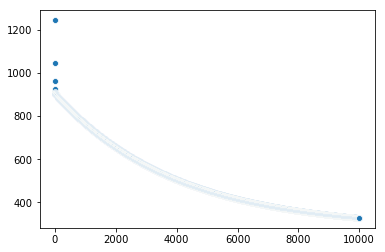

In [10]:
numEpochs= 10000
alpha = 0.0005
theta = np.array([1.90595185,1.5342646])
gradientDescent(x, y, theta, alpha, m, numEpochs)

### Google's Version
https://developers.google.com/machine-learning/crash-course/fitter/graph



#### Adaptive Learning Rates

The performance of the model on the training dataset can be monitored by the learning algorithm and the learning rate can be adjusted in response.

This is called an **adaptive learning rate**.

Perhaps the simplest implementation is to make the learning rate smaller once the performance of the model plateaus, such as by decreasing the learning rate by a factor of two or an order of magnitude.

A function that determines the learning rate at each step is called the *learning schedule*.

https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

https://machinelearningmastery.com/learning-rate-for-deep-learning-neural-networks/

# Applying Gradient Descent

 *Gradient Descent* is a very generic optimization algorithm capable of finding optimal solutions to a wide range of problems. The general idea of Gradient Descent is to tweak parameters iteratively in order to minimize a cost function.

When doing GD it is important to scale your features to a similiar scale or else it will take the algorithm longer to converge. 

<img src='./resources/scalecontour.png' width=500 />

## Batches

In gradient descent, a **batch** is the total number of examples you use to calculate the gradient in a single iteration. So far, we've assumed that the batch has been the entire data set. 

### Batch Gradient Descent

* This formula involves caluclations over the full training set X, at each Gradient Descent step. 
* Terribly slow on large number of observations, but scales well with the number of features.
* When training a Linear Regression model with hundreds of thousands of features Gradient Descent is much faster than using linear algebra and the Normal Equation.


### Stochastic Gradient Descent (SGD)

- Picks a random instance in the training set at every step and computes the gradients based only on that single instance. 

- Algorithm is much faster given it has very little data to manipulate. 

- Can be used as an out-of-core algorithm, since it only needs one data observation at a time

When the cost function is very irregular, SGD has a better chance of of finding the global minimum than BGD.
This could be bad because the algorithm will never settle at a minimum.  
One way to avoid this is by reducing the learning rate (step size) as the algorithm progresses. 



### Mini-batch Gradient Descent

At each step, computing the gradietns is based on a small random set of instaces called *mini-batches*.

Mini-batch GD will be less erratic than SGD because it is training on a multiple data instances. 

Faster than Batch GD.

Harder to escape local minima than SGD.

### Epochs

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.
One epoch is when an ENTIRE dataset is passed through the model one time.


#### How many epochs should we have?

Train each model along a sufficient number of epochs to see the training loss become stuck in a minimum. 

Many algorithms allow you to set up a parameter so that whenever you see the loss not improve after a number of epochs, it stops.  

### Iterations

**Iterations** is the number of batches needed to complete one epoch.

Let’s say we have 2000 training examples that we are going to use. We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

### Question:

Why would you use more than 1 epoch when fitting your model?

### Comparison of Types of Gradient Descent

<img src='./resources/comparegdtypes.png' width=600/>

<img src='./resources/algotable.png' width=600/>

<img src='./resources/albotable2.png' width=600/>

https://github.com/ageron/handson-ml.git

https://developers.google.com/machine-learning/crash-course/reducing-loss/playground-exercise